<a href="https://colab.research.google.com/github/yahya0081/house-price-predection/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression R2 Score: 0.6427197016625197
RMSE: 52349.369009087495
Random Forest R2 Score: 0.8877319697706483
Random Forest RMSE: 29345.057752498516


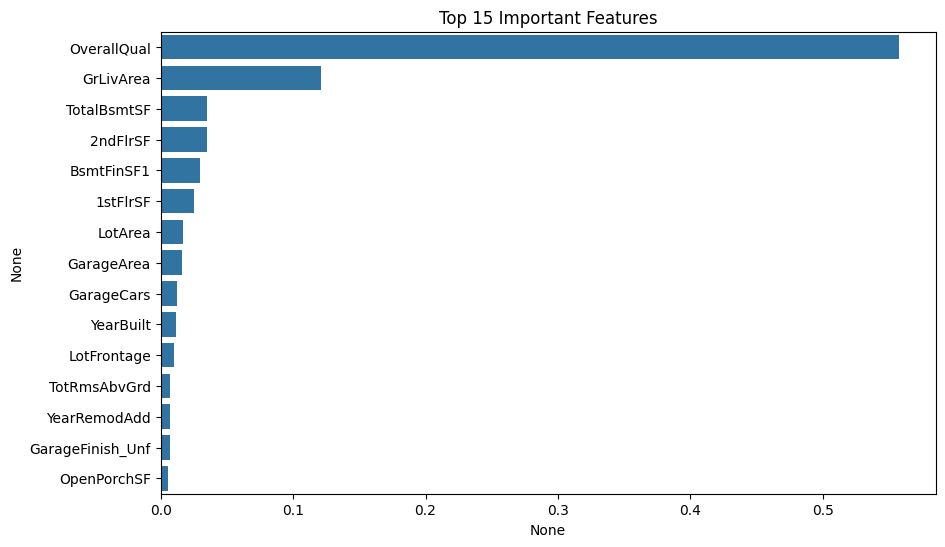

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('train.csv')

hold=len(df)*0.5
df=df.dropna(thresh=hold,axis=1)

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=['int64', 'float64']):
    df[col] = df[col].fillna(df[col].median())


df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))

importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 15 Important Features')
plt.show()



In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R² Score: 0.6427197016625197
RMSE: 52349.369009087495


# New section

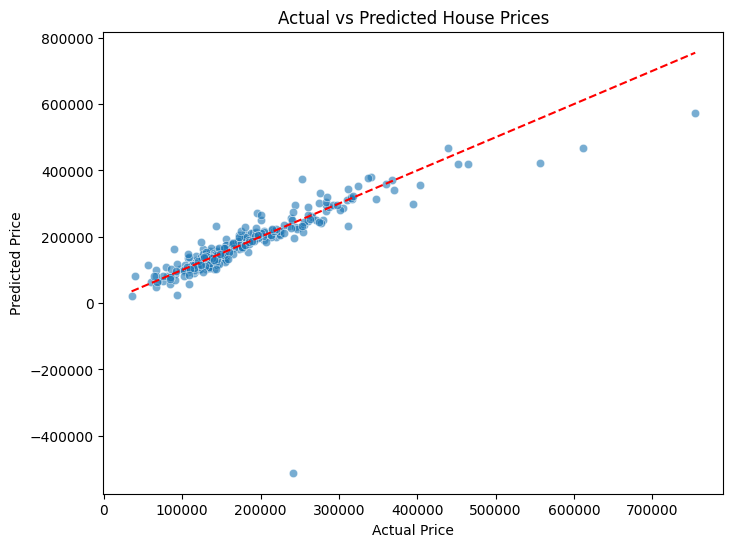

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# New section

In [11]:
import joblib

joblib.dump(model, "house_price_model.pkl")
print("Model saved successfully.")


Model saved successfully.
